In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [20]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [29]:
# Exploración de los datos
print(titanic_data.head())  # Muestra las primeras filas del dataframe
print(titanic_data.info())  # Información del dataframe
print(titanic_data.describe())  # Estadísticas descriptivas

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

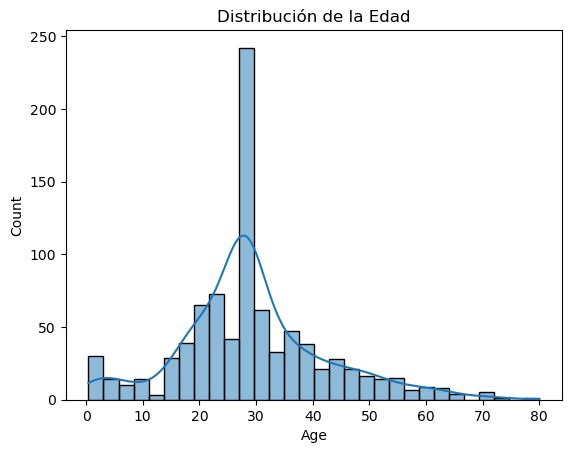

In [31]:
# Visualizar distribuciones de 'Age' y 'Fare'
sns.histplot(titanic_data['Age'].dropna(), kde=True, bins=30)
plt.title('Distribución de la Edad')
plt.show()


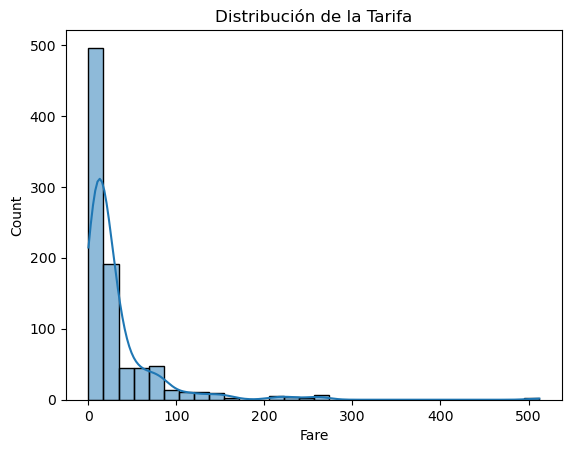

In [33]:
sns.histplot(titanic_data['Fare'], kde=True, bins=30)
plt.title('Distribución de la Tarifa')
plt.show()


In [37]:
# Imputar valores faltantes en 'Age' con la mediana
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

# Verificar si ahora hay valores faltantes
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [39]:
titanic_data.drop(columns=['Cabin'], inplace=True)

In [43]:
from sklearn.preprocessing import LabelEncoder

# Codificar la columna 'Sex'
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])

In [45]:
# Codificar la columna 'Embarked' usando get_dummies
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

In [47]:
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

In [49]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = titanic_data.drop(columns=['Survived', 'Name', 'Ticket'])  # Eliminamos 'Survived', 'Name' y 'Ticket' porque no son características
y = titanic_data['Survived']  # La variable objetivo

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la división
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")

Conjunto de entrenamiento: (712, 9)
Conjunto de prueba: (179, 9)


In [58]:
model = LogisticRegression(max_iter=1000)

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo con los datos escalados
model.fit(X_train_scaled, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f"Precisión: {accuracy}")
print(f"Matriz de confusión:\n{conf_matrix}")
print(f"Reporte de clasificación:\n{class_report}")

Precisión: 0.8044692737430168
Matriz de confusión:
[[89 16]
 [19 55]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



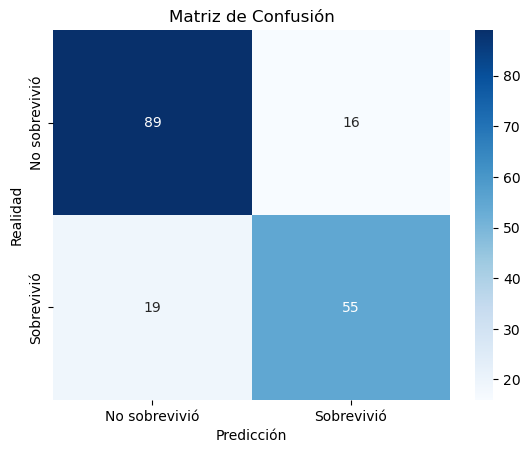

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

In [64]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
})
print(feature_importance.sort_values(by='Importance', ascending=False))

       Feature  Importance
6         Fare    0.128313
0  PassengerId    0.094279
7   Embarked_Q   -0.044822
5        Parch   -0.104351
8   Embarked_S   -0.189045
4        SibSp   -0.340233
3          Age   -0.396219
1       Pclass   -0.781824
2          Sex   -1.285659


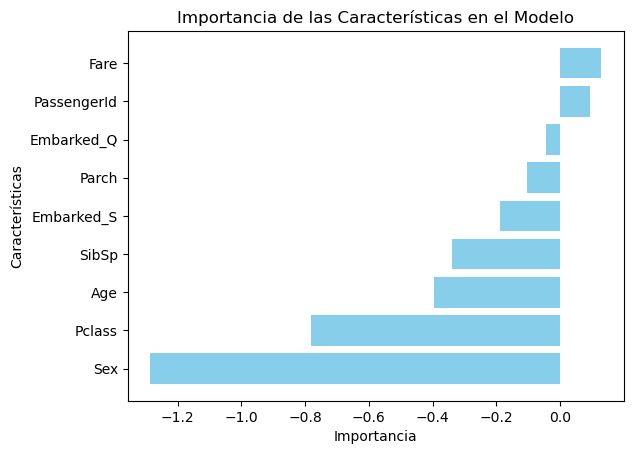

In [66]:
import matplotlib.pyplot as plt

feature_importance.sort_values(by='Importance', ascending=True, inplace=True)
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características en el Modelo')
plt.show()

In [68]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Precisión promedio con validación cruzada: {scores.mean():.2f}")

Precisión promedio con validación cruzada: 0.79
